# 계층적 군집

## #01. 패키지

모델 : scipy.cluster.AgglomerativeClustering

거리계산 : scipy.cluster.hierarchy.linkage

시각화 : scipy.cluster.hierarchy.dendrogram

평가 : sklearn.metrics.silhouette_score , silhouette_samples, yellowbrick.cluster.KElbowVisualizer

In [7]:
import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas import read_excel, DataFrame

# sklearn은 AgglomerativeClustering() 함수를 제공
from sklearn.cluster import AgglomerativeClustering

# 표준화
from sklearn.preprocessing import MinMaxScaler

In [10]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [29]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드수정,읍면동명,생성일자,말소일자,지하철역수,의료기관수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,NaN,NaN,11.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,NaN,2.0,75.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,NaN,NaN,11.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,NaN,NaN,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,NaN,NaN,15.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


## #03. 데이터 전처리

### 필요한 데이터만 추출

In [4]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드수정', '읍면동명', '생성일자', '말소일자',
       '지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'],
      dtype='object')

In [34]:
df = origin.filter(['지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'])
df.head()

,지하철역수,의료기관수,사회복지시설수,계(명),면적,구성비,행정동별공원수,공공체육시설수,문화시설수,학교수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,NaN,11.0,5.0,11700,2.57,0.42,2.0,10.0,6.0,8.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,2.0,75.0,1.0,9362,1.23,0.20,3.0,8.0,13.0,2.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,NaN,11.0,NaN,2576,1.49,0.25,1.0,2.0,31.0,2.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,NaN,4.0,4.0,9377,2.27,0.38,1.0,5.0,5.0,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,NaN,15.0,11.0,17658,8.87,1.47,NaN,5.0,11.0,4.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


In [35]:
df = df.fillna(0)
df.isna().sum()

지하철역수      0
의료기관수      0
사회복지시설수    0
계(명)       0
면적         0
구성비        0
행정동별공원수    0
공공체육시설수    0
문화시설수      0
학교수        0
사업체수       0
보육시설       0
주차장개소      0
주차장면수      0
하천및한강여부    0
아동인구       0
노인인구       0
장애인인구      0
세대당공원면적    0
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

In [36]:
X = df.filter(['세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'])
X.head()

,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,337.55,0.883757,12.240301,0.978054
1,60.79,0.952852,35.399526,2.354708
2,956.51,0.715943,39.839834,2.266277
3,0.00,0.710363,5.777047,1.081284
4,1.14,0.714284,2.630924,1.576024


### 결측치 확인

In [12]:
X.isna().sum()

세대당공원면적    3
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

In [13]:
X = X.fillna(0)
X.isna().sum()

세대당공원면적    0
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

### 이상치 `int` 확인

In [18]:
is_inf = X.isin([np.inf, -np.inf])

# 각 column별로 -inf 또는 inf 값을 포함하고 있는 행 수를 확인
inf_count = is_inf.sum()

# 결과 출력
inf_count

세대당공원면적    0
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

In [19]:
X.columns

Index(['세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'], dtype='object')

In [21]:
# X['교통약자지수'].unique()

### 데이터 스케일링

In [22]:
scaler = MinMaxScaler()
n_data = scaler.fit_transform(X)
n_data[:5]

array([[0.35289751, 0.06840039, 0.55142171, 0.10048566],
       [0.06355396, 0.07374816, 0.58150179, 0.24192358],
       [1.        , 0.05541202, 0.58726904, 0.23283811],
       [0.        , 0.0549802 , 0.54302699, 0.11109153],
       [0.00119183, 0.05528363, 0.53894068, 0.16192126]])

In [23]:
ndf = DataFrame(n_data, columns=X.columns)
ndf.head()

,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,0.352898,0.068400,0.551422,0.100486
1,0.063554,0.073748,0.581502,0.241924
2,1.000000,0.055412,0.587269,0.232838
3,0.000000,0.054980,0.543027,0.111092
4,0.001192,0.055284,0.538941,0.161921


> 전원 수치 데이터임으로 라벨링 필요 없음

## #04. 계층 군집 수행

### 1. scipy 패키지

scipy는 모델 생성/시각화 과정이 반자동이지만 sklearn은 수동으로 설정(공식으로 판단할 것)

linkage : 거리 측정 방법 지정<br/>
기본 값 : `ward`<br/>
그 외 값 : ‘ward’, ‘complete’, ‘average’, ‘single’

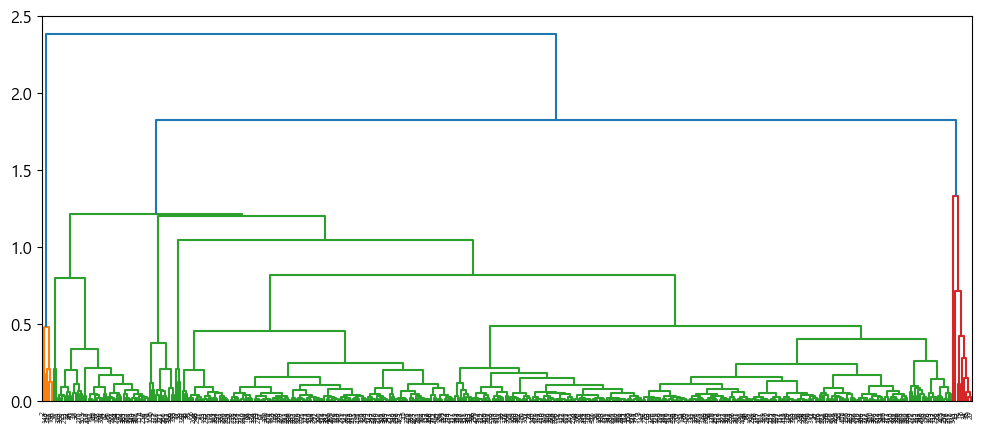

In [24]:
lnk = linkage(ndf, method="ward")
plt.figure(figsize=(12,5))
dendrogram(lnk, show_leaf_counts=True)
plt.show()
plt.close()

### 2. sklearn 패키지

n_clusters : 찾아야 할 클러스터 수(earlystopping과 유사)

affinity : 클러스터 간 거리 측정 방법(euclidean, cityblock, manhattan, cosine)

linkage : ward(기본값), complete, average, single

compute_distances : 노드간의 거리 계산값을 저장할지 여부(시각화를 위해서는 True를 필수 적용)

`n_clusters`은 K-Means에서 엘보우 그래프로 확인된 `4`를 사용.

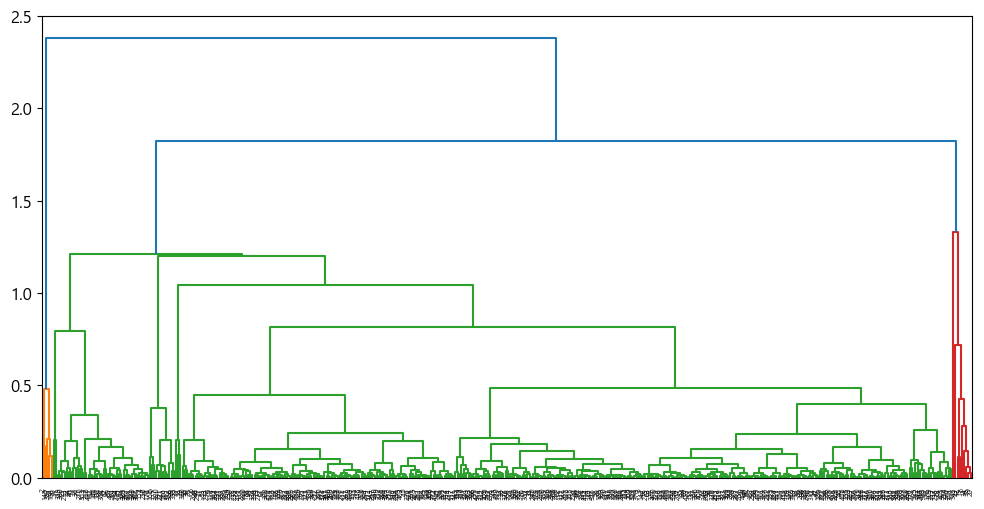

In [25]:
# 모델 객체 생성
ac = AgglomerativeClustering(n_clusters=5,  # 찾아야 할 클러스터 수(earlystopping과 유사)
                             metric='euclidean',  # 클러스터 간 거리 측정 방법
                             linkage='ward',    # 거리측정 방법
                             compute_distances=True #시각화를 위하 반드시 필요
                             )
# clustering = ac.fit(n_data) #학습

clustering = ac.fit(ndf) #학습
# print(clustering.labels_)   #학습결과 확인

# scipy는 아래의 과정을 자동으로 수행, sklearn은 수동으로 설정(공식으로 판단할 것)
counts = np.zeros(clustering.children_.shape[0])    #zeros 모든 원소가 0인 요소
n_samples = len(clustering.labels_)

# 자식 노드를 반복하면서 점을 찍어준다(자식이 몇개 있는지 확인하는 과정)
for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# 자식 노드의 수를 저장하는 배열
linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
).astype(float)

# plt를 설정하지 않으면 쓸데 없는 값도 함께 추출됨
# dendrogram(linkage_matrix)

plt.figure(figsize=(12,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

### 군집수를 4로 설정한 분류 결과값

In [26]:
clustering.labels_

array([0, 1, 4, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 분류 결과를 DataFrame과 결합

> 군집(label)을 포함한 DF 생성. <br/>labels를 hue로 잡고 진행하면 군집의 분류 결과를 알 수 있기 때문.

In [37]:
df['계층군집_결과'] = clustering.labels_
df.head()

,지하철역수,의료기관수,사회복지시설수,계(명),면적,구성비,행정동별공원수,공공체육시설수,문화시설수,학교수,...,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수,계층군집_결과
0,0.0,11.0,5.0,11700,2.57,0.42,2.0,10.0,6.0,8.0,...,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054,0
1,2.0,75.0,1.0,9362,1.23,0.20,3.0,8.0,13.0,2.0,...,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708,1
2,0.0,11.0,0.0,2576,1.49,0.25,1.0,2.0,31.0,2.0,...,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277,4
3,0.0,4.0,4.0,9377,2.27,0.38,1.0,5.0,5.0,4.0,...,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284,0
4,0.0,15.0,11.0,17658,8.87,1.47,0.0,5.0,11.0,4.0,...,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024,1


In [32]:
X.columns

Index(['세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'], dtype='object')

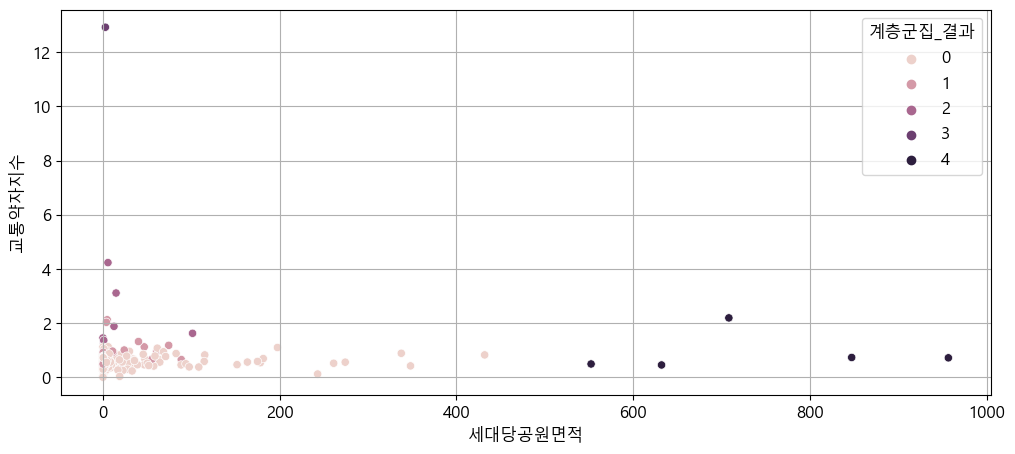

In [39]:
plt.figure(figsize=(12,5))
# #sb.scatterplot(x=n_data[, 0], y=n_data[, 1])
sb.scatterplot(data=df, x='세대당공원면적', y='교통약자지수', hue='계층군집_결과')
plt.grid()
plt.show()
plt.close()